## Extracting GSOD Weather Data 


The Global Surface Summary of the Day (GSOD) obtained from the National Centers for Environmental Information (NCEI) contains global daily summary data of over 9000 weather stations' data around the globe. Some of the data recorded includes mean temperature and windspeed. 

Refer to the GSOD README for indepth elaboration: https://www.ncei.noaa.gov/data/global-summary-of-the-day/doc/readme.txt

Archived GSOD Data can be acessed through this link: https://www.ncei.noaa.gov/data/global-summary-of-the-day/archive/

Corresponding station_id data for the different states/countries is obtained here: https://www.ncei.noaa.gov/maps/daily/?layers=0001

The latest daily summary data is normally available 1-2 days after observations. GSOD data is still constantly updated as of 4/8/22.

<u> gsodpy.py <u> contains the necessary functions to extract and transform the raw GSOD data. 

In order for code to run, the respective tar files should be placed into __noaa_gsod directory__. The tar files are too big to be stored on the Github Repo, therefore they will have to be downloaded separately.

In [ ]:
# scrape raw gsod tar files from website into local desktop
gsod.get_data(directory = "noaa_gsod")

## Weather Data Manipulation

Import statements

In [1]:
import gsodpy as gsod
import pandas as pd
import datetime
import numpy as np
import pandas as pd
import tarfile
import re
import os
import datetime
import io
warnings.filterwarnings("ignore")


num_years = 23
years, files = gsod.get_years_files(num_years)

In [ ]:
loc_list = ['Argentina', 'Brazil', 'California', 'Illinois', 'Iowa', 'Minnesota', 'Nebraska']

df = gsod.combine_region_data(loc_list, files)

#### Exporting summarized daily weather data to GBQ

GSOD weather data for a subset of states/countries is already sent to GBQ: Refer to GBQ for the list of states/countries

In [ ]:
#df.reset_index().to_gbq(destination_table = "WEATHER_DATA.NOAA_GSOD_SUMMARISED", project_id="caleb-database-project-1", if_exists = "append", table_schema = [{"name": "DATE", "type": "DATE"}])


## Plotting

In [8]:
import plotly
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

In [9]:
cali_data = pd.read_csv('cali_weather.csv', index_col = 'DATE')
cali_data.index = pd.to_datetime(cali_data.index)
cali_data.head()

,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,
2010-01-01,10.014729,24.0,-12.0,0.059839,3.610656
2010-01-02,10.923622,28.0,-14.0,0.033680,3.513333
2010-01-03,10.291200,27.7,-16.0,0.002720,3.442373
2010-01-04,10.092424,26.7,-15.0,0.013740,3.150400
2010-01-05,9.520455,27.0,-15.0,0.003588,2.549600


In [10]:
cali_data.plot()

In [11]:
cali_data = cali_data.asfreq('MS')
cali_data.head()

,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,
2010-01-01,10.014729,24.0,-12.0,0.059839,3.610656
2010-02-01,9.252672,22.2,-20.0,0.001769,2.662602
2010-03-01,11.588722,31.7,-9.0,0.005414,3.660800
2010-04-01,8.846970,22.5,-14.0,0.044409,6.087903
2010-05-01,13.987970,30.0,-5.0,0.000902,6.843200


In [12]:
cali_data.plot()

Seasonal Decomposing

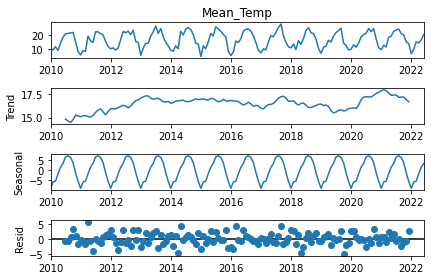

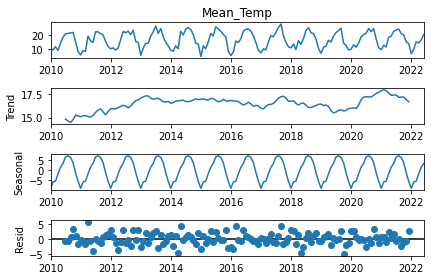

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(cali_data.loc[:,'Mean_Temp'], model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot()

https://pythonhosted.org/pandas-ply/